<h1>O que é Aprendizado de Máquina</h1>
<p>É um campo da <a href="https://www.tecmundo.com.br/intel/1039-o-que-e-inteligencia-artificial-.htm" target="_blank">Inteligência Artificial (IA)</a> que dá aos computadores a capacidade de aprender sem serem explicitamente programados, ou seja, permite que os computadores aprendam a executar tarefas a partir de dados.</p>
<h3>Não entendeu ainda? Vamos tentar novamente</h3>
<p>Aprendizado de máquina é a ideia de que existem <a href="https://pt.wikipedia.org/wiki/Algoritmo" target="_blank">algoritmos</a> genéricos que podem lhe dizer algo interessante sobre um <a href="https://pt.wikipedia.org/wiki/Conjunto_de_dados" target="_blank">conjunto de dados</a> sem que você tenha que escrever nenhum código específico ao problema.  Ao invés de escrever código, você alimenta o algoritmo genérico com os dados e ele constrói a sua própria logica com base nos dados.<p>

<h1>Definição Formal</h1>
<p>Diz-se que um programa de computador aprende a executar uma <strong>tarefa T</strong> a partir da <strong>experiência E</strong>, se seu desempenho na tarefa T, medido por uma métrica de <strong>desempenho P</strong>, melhora com a experiência E ao longo do tempo.</p>
<h3>Exemplificando a definição</h3>
<p>Vamos supor que um computador tenha que aprender a jogar xadrez (Tarefa T). Paro isso, ele "assiste" partidas anteriores ou joga contra um tutor (Experiência E). Seu desempenho P pode ser medido contanto a porcentagem de partidas ganhas contra um humano. Se ao longo do tempo a porcentagem estiver aumentando, pode se dizer que o computador está aprendendo a jogar xadrez</p>

<h1>Tipos de algoritmos de Aprendizado de Máquina</h1>
<p> Temos dois tipos gerais de algoritmos de aprendizado de máquina, <strong>Aprendizado Supervisionado</strong> e <strong>Aprendizado não Supervisionado</strong>. A principal diferença entre as duas abordagens reside na forma como fornecemos exemplos de treinamento ao nosso algoritmo, como o algoritmo os utiliza e o tipo de problemas que eles resolvem. A definição dos tipos segue:
    <ul>
        <li><strong>Aprendizado Supervisionado: </strong>O programa é “treinado” em um conjunto pré-definido de “exemplos de treinamento”, o que facilita sua capacidade de chegar a uma conclusão precisa quando receber novos dados.</li>
        <li><strong>Aprendizado não Supervisionado: </strong>O programa recebe um conjunto de dados e precisa encontrar padrões e relacionamentos nele.</li>
    </ul>
<h1>Redes Neurais - Uma Técnica para Implementar Machine Learning</h1>
<p>Redes Neurais Artificias é uma subárea do Aprendizado de Máquina, que emprega algoritmos para processar dados e imitar o processamento feito pelo cérebro humano.</p>

<h1> Exemplo Prático</h1>
<p> Vamos Reconhecer Digitos escritos a mão? </p>

<h3>Importações Necessárias</h3>

In [89]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

<h3>Carregando os dados</h3>

In [2]:
mnist = tf.keras.datasets.mnist # imagens 28x28 de digitos escritos a mão de 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data()

<h3>Visualizando um exemplo</h3>

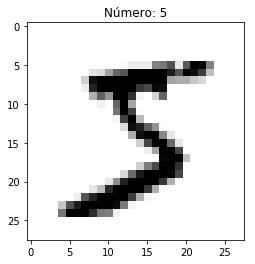

In [3]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.title("Número: %i"%y_train[0])
plt.show()

<h3>Normalizando os dados</h3>

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

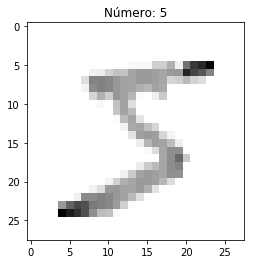

In [5]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.title("Número: %i"%y_train[0])
plt.show()

In [8]:
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)

<h3>Construindo a rede neural</h3>

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1, 28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<h3>Treinando nossa rede</h3>

In [10]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 19s 312us/step - loss: 0.2574 - acc: 0.9252
Epoch 2/5
60000/60000 [==============================] - 18s 307us/step - loss: 0.1092 - acc: 0.9670
Epoch 3/5
60000/60000 [==============================] - 18s 307us/step - loss: 0.0753 - acc: 0.9769
Epoch 4/5
60000/60000 [==============================] - 19s 310us/step - loss: 0.0558 - acc: 0.9824
Epoch 5/5
10000/10000 [==============================] - 1s 75us/step


[0.0834706033622846, 0.9735]

<h3>Salvando e carregando nossa rede</h3>

In [11]:
model.save("mnist.model")
new_model = tf.keras.models.load_model("mnist.model")

<h3>Fazendo previsões</h3>

In [17]:
np.argmax(new_model.predict([x_test[0].reshape(1, 1, 28, 28)]))

7

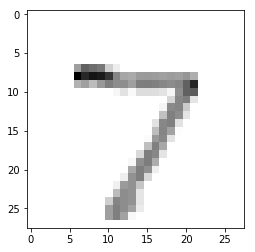

In [20]:
plt.imshow(x_test[0].reshape(28,28), cmap=plt.cm.binary)

<h1>Vamos testar com imagens feitas por nós?</h1>
<ol>
    <li>Primeiro vamos abrir o Paint</li>
    <li>
        Com o paint aberto, vamo fazer algumas configurações
        <ol>
            <li>Redimensionar o tamanho do paint para 28x28</li>
            <li>Aumentar o Zoom para o máximo</li>
            <li>Pintar o fundo de preto</li>
            <li>Selecionar a cor principal como branca</li>
        </ol>
   </li>
    <li>Desenhe um número e salve como JPEG</li>
</ol>

In [91]:
def prever(image):
    image = np.array(Image.open(image).convert("L"))
    plt.imshow(image, cmap=plt.cm.binary)
    image = tf.keras.utils.normalize(image)
    image = image.reshape(1, 1, 28, 28)
    predict = np.argmax(model.predict([image]))
    plt.title("Número previsto: %i"%predict)
    plt.show()

<h3>Passe o mesmo nome do arquivo que você salvo para a função</h3>

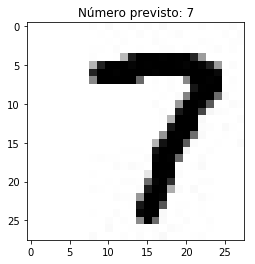

In [92]:
prever("sete.jpg")